In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Обязательная часть
Будем осуществлять работу с непростым набором данных о состоянии здоровья лошадей, испытывающих кишечные колики.

In [2]:
column_names = ['surgery?', 'Age', 'Hospital Number', 'rectal temperature', 'pulse', 'respiratory rate', 
                'temperature of extremities', 'peripheral pulse', 'mucous membranes', '9', '10', '11', '12', '13', '14', 
                '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27']

In [3]:
df = pd.read_csv('horse_data.csv', header = None, names = column_names, na_values = '?')
df

,surgery?,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1


## Задание 1. Базовое изучение
Изучить представленный набор данных на основе описания его столбцов и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

In [4]:
# Будем рассматривать первые восемь столбцов (за исключением столбца 3 с Hospital Number)

# Для этого удалим остальные столбцы:

df = df.drop(['Hospital Number', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
              '20', '21', '22', '23', '24', '25', '26', '27'], axis = 1)
df

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes
0,2.0,1,38.5,66.0,28.0,3.0,3.0,NaN
1,1.0,1,39.2,88.0,20.0,NaN,NaN,4.0
2,2.0,1,38.3,40.0,24.0,1.0,1.0,3.0
3,1.0,9,39.1,164.0,84.0,4.0,1.0,6.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,70.0,4.0,NaN,4.0
296,2.0,1,37.2,72.0,24.0,3.0,2.0,4.0
297,1.0,1,37.5,72.0,30.0,4.0,3.0,4.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,3.0


Расчёт базовых статистик (имеет смысл только для количественных показателей - rectal temperature, pulse и respiratory rate):

In [5]:
df.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,231.000000,253.000000
mean,1.397993,1.640000,38.167917,71.913043,30.417355,2.348361,2.017316,2.853755
std,0.490305,2.173972,0.732289,28.630557,17.642231,1.045054,1.042428,1.620294
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,2.000000,3.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,3.000000,4.000000
max,2.000000,9.000000,40.800000,184.000000,96.000000,4.000000,4.000000,6.000000


In [6]:
print('Значения мод:')
print('rectal temperature:', df['rectal temperature'].mode()[0], 'degrees celsius')
print('pulse:', df['pulse'].mode()[0], 'beats per minute')
print('respiratory rate:', df['respiratory rate'].mode()[0])

Значения мод:
rectal temperature: 38.0 degrees celsius
pulse: 48.0 beats per minute
respiratory rate: 20.0


## Задание 2. Работа с выбросами
В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

Для обоснованного принятия решения относительно выявления выбросов по температуре, пульсу и частоте дыхания необходимы экспертные знания в рассматриваемой области. Будем ориентироваться информацию с сайта http://fourhoofs.ru/ и комментарии, имеющиеся к предоставленному набору данных. Если пульс и частота дыхания регистрируются в состоянии покоя лошади, то:

### Температура и пульс
- нормальная температура лошади должна находиться в пределах 37.5-38.5 градусов Цельсия (отклонение от этой температуры свидетельствует о каком-то заболевании или внешней ране)
- в редких случаях температура может быть ниже нормы (37.5 градусов). Такое возможно в случае длительного переохлаждения или если лошадь находится в состоянии шока
- reflection of the heart condition: 30 - 40 is normal for adults
- rare to have a lower than normal rate although athletic horses may have a rate of 20-25

Проверим для скольки лошадей температура в норме:

In [7]:
df_norm_temp = df[df['rectal temperature'].between(37.5, 38.5, inclusive=True)].dropna(subset = ['rectal temperature'])
norm_temp_percentage = round(len(df_norm_temp)*100 / len(df.dropna(subset = ['rectal temperature'])), 2)
print(f'Среди строк, где имеется информация о температуре, в пределах нормы находится {norm_temp_percentage}% значений')

Среди строк, где имеется информация о температуре, в пределах нормы находится 63.33% значений


Проверим адекватность данных, в которых температура выше нормы:

In [8]:
df_high_temp = df[df['rectal temperature'] > 38.5].dropna(subset = ['rectal temperature'])
df_high_temp.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes
count,58.000000,58.000000,58.000000,54.000000,50.00000,49.000000,44.000000,50.000000
mean,1.482759,2.517241,39.081034,83.240741,38.40000,2.469388,2.045455,3.100000
std,0.504067,3.163617,0.491848,36.352019,22.24722,1.022702,1.077347,1.887121
min,1.000000,1.000000,38.600000,40.000000,10.00000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,38.700000,52.000000,20.00000,2.000000,1.000000,1.000000
50%,1.000000,1.000000,38.950000,74.000000,33.00000,3.000000,2.000000,3.000000
75%,2.000000,1.000000,39.300000,106.000000,49.50000,3.000000,3.000000,5.000000
max,2.000000,9.000000,40.800000,184.000000,96.00000,4.000000,4.000000,6.000000


In [9]:
high_temp_percentage = round(len(df_high_temp)*100 / len(df.dropna(subset = ['rectal temperature'])), 2)
print(f'Среди строк, где имеется информация о температуре, выше нормы находится {high_temp_percentage}% значений')

Среди строк, где имеется информация о температуре, выше нормы находится 24.17% значений


В описании данных сказано, что "reflection of the heart condition: 30 - 40 is normal for adults". Видно, что для всех случаев, когда температура выше нормы, пульс больше 40 ударов в минуту (то есть он также превышает верхний предел нормального диапазона). Таким образом, можно сделать вывод, что выбросы температуры "вверх" есть, но они обоснованы (имеют "физический" смысл), т.к. сопровождаются повышенными значениями пульса, что может быть объяснено или наиличием заболевания, или измерением, проведённым не в состоянии покоя.

Проверим адекватность данных, в которых температура ниже нормы:

In [10]:
df_low_temp = df[df['rectal temperature'] < 37.5].dropna(subset = ['rectal temperature'])
df_low_temp.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes
count,30.000000,30.0,30.000000,30.000000,27.000000,21.000000,19.000000,26.000000
mean,1.366667,1.0,36.963333,68.766667,26.111111,2.285714,2.315789,3.192308
std,0.490133,0.0,0.481723,25.885269,10.739336,0.902378,0.945905,1.575290
min,1.000000,1.0,35.400000,36.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.0,36.825000,48.000000,20.000000,1.000000,1.000000,2.000000
50%,1.000000,1.0,37.200000,63.000000,24.000000,3.000000,3.000000,3.000000
75%,2.000000,1.0,37.300000,84.000000,35.000000,3.000000,3.000000,4.000000
max,2.000000,1.0,37.400000,140.000000,48.000000,3.000000,3.000000,6.000000


In [11]:
df[(df['rectal temperature'] < 37.5) & (df['pulse'] < 40)].dropna(subset = ['rectal temperature'])

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes
203,2.0,1,37.2,36.0,9.0,1.0,1.0,1.0


In [12]:
low_temp_percentage = round(len(df_low_temp)*100 / len(df.dropna(subset = ['rectal temperature'])), 2)
print(f'Среди строк, где имеется информация о температуре, выше нормы находится {low_temp_percentage}% значений')

Среди строк, где имеется информация о температуре, выше нормы находится 12.5% значений


Видно, что для всех случаев кроме одного, когда температура ниже нормы, пульс больше 40 ударов в минуту (то есть он также превышает верхний предел нормального диапазона). Таким образом, выбросы температуры "вниз" есть, но они обоснованы (имеют "физический" смысл), т.к. сопровождаются повышенными значениями пульса, что может быть объяснено или наиличием заболевания.

### Частота дыхания
Поскольку в комментариях к данным сказано, что полезность информации о частоте дыхания спорна ввиду значительных колебаний ("usefulness is doubtful due to the great fluctuations"), то проверка наличия выбросов этого показателя не целесообразна.

# Задание 3. Работа с пропусками
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

Оценим количество пропусков в рассматриваемых столбцах:

In [13]:
for col in df.columns:
    pct_missing = df[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

surgery? - 0.3%
Age - 0.0%
rectal temperature - 20.0%
pulse - 8.0%
respiratory rate - 19.3%
temperature of extremities - 18.7%
peripheral pulse - 23.0%
mucous membranes - 15.7%


Поскольку мы работаем с данными, в которых основными количественным показателями являются температура, пульс и частота дыхания, стоит удалть строки, в которых все три отсутствуют. Ведь в этом случае не будет оснований, для восполнения этих пропусков.

In [14]:
df = df.dropna(subset=['rectal temperature', 'pulse', 'respiratory rate'], how='all')
df

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes
0,2.0,1,38.5,66.0,28.0,3.0,3.0,NaN
1,1.0,1,39.2,88.0,20.0,NaN,NaN,4.0
2,2.0,1,38.3,40.0,24.0,1.0,1.0,3.0
3,1.0,9,39.1,164.0,84.0,4.0,1.0,6.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,70.0,4.0,NaN,4.0
296,2.0,1,37.2,72.0,24.0,3.0,2.0,4.0
297,1.0,1,37.5,72.0,30.0,4.0,3.0,4.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,3.0


Судя по pair plot (scatter plot matrix) для рассматриваемых количественных показателей (температура, пульс и частота дыхания),  между ними нет достаточно выраженной корреляции для того, чтобы восстанавливать какое-либо из них по двум другим:

In [15]:
df_without_nans = df.dropna(subset=['rectal temperature', 'pulse', 'respiratory rate'])

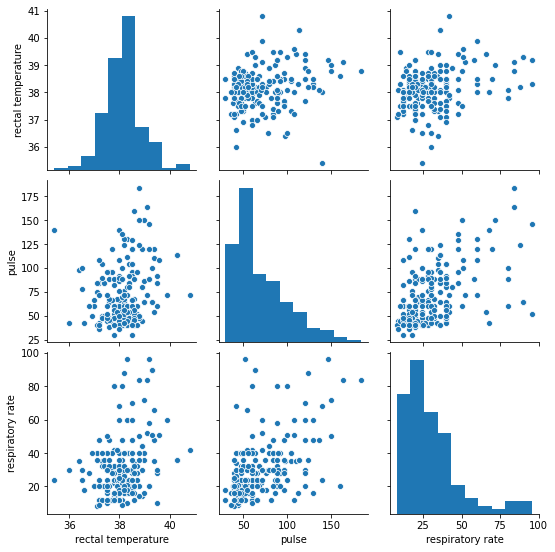

In [16]:
sns.pairplot(df_without_nans[['rectal temperature', 'pulse', 'respiratory rate']])

При этом распределения этих величин не являются нормальными. Зато каждая их них имеет ярко выраженную моду. Поэтотму заменим пропущенные значения температуры, пульса и частота дыхания модами:

In [17]:
df_filled = df.fillna(df['rectal temperature'].mode()[0])
df_filled = df_filled.fillna(df_filled['pulse'].mode()[0])
df_filled = df_filled.fillna(df_filled['respiratory rate'].mode()[0])
df_filled

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes
0,2.0,1,38.5,66.0,28.0,3.0,3.0,38.0
1,1.0,1,39.2,88.0,20.0,38.0,38.0,4.0
2,2.0,1,38.3,40.0,24.0,1.0,1.0,3.0
3,1.0,9,39.1,164.0,84.0,4.0,1.0,6.0
4,2.0,1,37.3,104.0,35.0,38.0,38.0,6.0
...,...,...,...,...,...,...,...,...
295,1.0,1,38.0,120.0,70.0,4.0,38.0,4.0
296,2.0,1,37.2,72.0,24.0,3.0,2.0,4.0
297,1.0,1,37.5,72.0,30.0,4.0,3.0,4.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,3.0
